In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# Step 1: Create a Sample Academic Performance Dataset
np.random.seed(42)
data = {
    "Student_ID": range(1, 101),
    "Math_Score": np.random.randint(40, 100, 100),
    "Science_Score": np.random.randint(35, 95, 100),
    "English_Score": np.random.randint(45, 98, 100),
    "Attendance_Rate": np.random.uniform(60, 100, 100),
}

In [3]:
df = pd.DataFrame(data)

In [4]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance_Rate
0,1,78,48,51,97.620931
1,2,91,57,95,75.902881
2,3,68,94,66,80.710054
3,4,54,91,72,93.508404
4,5,82,74,46,87.027605
...,...,...,...,...,...
95,96,53,77,63,76.791234
96,97,70,63,64,70.248278
97,98,87,70,76,84.460548
98,99,54,47,51,63.263767


In [5]:
# Introduce missing values
df.loc[np.random.choice(df.index, 5), "Math_Score"] = np.nan
df.loc[np.random.choice(df.index, 5), "Science_Score"] = np.nan


In [6]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance_Rate
0,1,78.0,48.0,51,97.620931
1,2,91.0,57.0,95,75.902881
2,3,68.0,94.0,66,80.710054
3,4,54.0,91.0,72,93.508404
4,5,82.0,74.0,46,87.027605
...,...,...,...,...,...
95,96,53.0,77.0,63,76.791234
96,97,70.0,63.0,64,70.248278
97,98,87.0,70.0,76,84.460548
98,99,54.0,47.0,51,63.263767


In [7]:
df.isnull()

,Student_ID,Math_Score,Science_Score,English_Score,Attendance_Rate
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
95,False,False,False,False,False
96,False,False,False,False,False
97,False,False,False,False,False
98,False,False,False,False,False


In [8]:
df.isnull().sum()

,0
Student_ID,0
Math_Score,5
Science_Score,5
English_Score,0
Attendance_Rate,0


In [9]:
# Introduce outliers
df.loc[5, "Math_Score"] = 10
df.loc[15, "Science_Score"] = 5
df.loc[25, "English_Score"] = 150

In [11]:
# Display dataset
print("Initial Dataset with Missing Values and Outliers:\n", df.head(10))


Initial Dataset with Missing Values and Outliers:
    Student_ID  Math_Score  Science_Score  English_Score  Attendance_Rate
0           1        78.0           48.0             51        97.620931
1           2        91.0           57.0             95        75.902881
2           3        68.0           94.0             66        80.710054
3           4        54.0           91.0             72        93.508404
4           5        82.0           74.0             46        87.027605
5           6        10.0           55.0             86        89.408645
6           7        60.0           50.0             89        68.362865
7           8         NaN           79.0             97        81.657919
8           9        97.0           52.0             50        87.831376
9          10        58.0           81.0             72        69.142001


In [13]:
df.fillna(df.mean(), inplace=True)  # Replace missing values with median


In [14]:
df.isnull().sum()

,0
Student_ID,0
Math_Score,0
Science_Score,0
English_Score,0
Attendance_Rate,0


In [15]:
def remove_outliers_iqr(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[col] = np.where((df[col] < lower_bound) | (df[col] > upper_bound), df[col].median(), df[col])


In [16]:
numeric_cols = ["Math_Score", "Science_Score", "English_Score"]
for col in numeric_cols:
    remove_outliers_iqr(col)

In [17]:
df["Attendance_Rate_Log"] = np.log(df["Attendance_Rate"])


In [19]:
df

,Student_ID,Math_Score,Science_Score,English_Score,Attendance_Rate,Attendance_Rate_Log
0,1,78.0,48.0,51.0,97.620931,4.581092
1,2,91.0,57.0,95.0,75.902881,4.329455
2,3,68.0,94.0,66.0,80.710054,4.390863
3,4,54.0,91.0,72.0,93.508404,4.538051
4,5,82.0,74.0,46.0,87.027605,4.466225
...,...,...,...,...,...,...
95,96,53.0,77.0,63.0,76.791234,4.341090
96,97,70.0,63.0,64.0,70.248278,4.252036
97,98,87.0,70.0,76.0,84.460548,4.436285
98,99,54.0,47.0,51.0,63.263767,4.147313


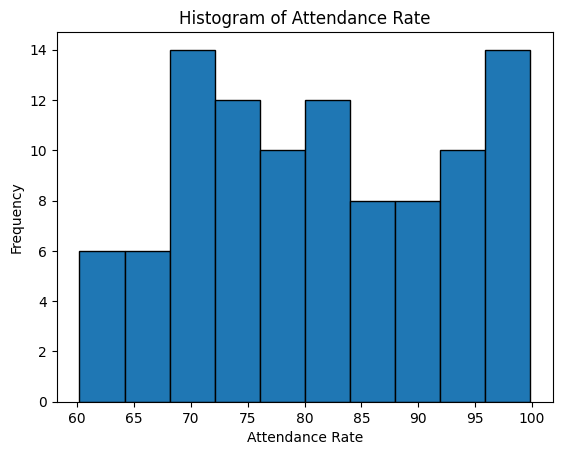

In [31]:
plt.hist(df["Attendance_Rate"], edgecolor='black',)
plt.xlabel("Attendance Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Attendance Rate")
plt.show()

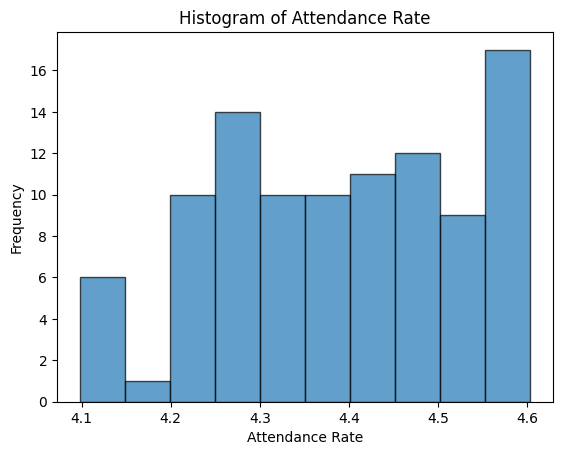

In [32]:
plt.hist(df["Attendance_Rate_Log"], bins=10, edgecolor='black', alpha=0.7)
plt.xlabel("Attendance Rate")
plt.ylabel("Frequency")
plt.title("Histogram of Attendance Rate")
plt.show()

In [40]:
sd_MathScore = StandardScaler()
sd_Attend = StandardScaler()

In [43]:
mathScore = sd_MathScore.fit_transform(df[["Math_Score"]])
attenScore = sd_Attend.fit_transform(df[["Attendance_Rate"]])

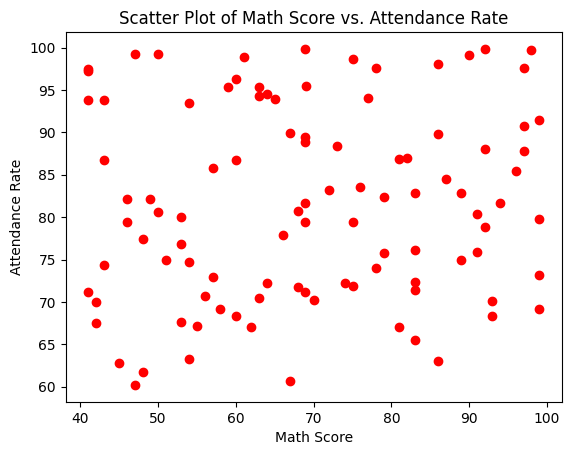

In [47]:
plt.scatter(df[["Math_Score"]], df[["Attendance_Rate"]],c='r')
plt.xlabel("Math Score")
plt.ylabel("Attendance Rate")
plt.title("Scatter Plot of Math Score vs. Attendance Rate")
plt.show()

In [ ]:
plt.scatter(df[["Math_Score"]], df[["Attendance_Rate"]],c='r')
plt.xlabel("Math Score")
plt.ylabel("Attendance Rate")
plt.title("Scatter Plot of Math Score vs. Attendance Rate")
plt.show()